## Data processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causalnex.structure import StructureModel
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")  # silence warnings

In [3]:
data_path = 'ukbb.csv'

In [4]:
df = pd.read_csv(data_path,low_memory=False)
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,4079-2.0,4079-2.1,4080-2.0,4080-2.1,48-2.0,...,41270-0.233,41270-0.234,41270-0.235,41270-0.236,41270-0.237,41270-0.238,41270-0.239,41270-0.240,41270-0.241,41270-0.242
0,1020226,55.0,0.0,22.3386,819768.0,64.0,68.0,113.0,107.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020261,60.0,1.0,27.2576,818099.0,100.0,96.0,145.0,137.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020278,67.0,1.0,35.8180,703103.0,70.0,65.0,141.0,132.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020394,52.0,1.0,35.6728,810799.0,87.0,89.0,131.0,136.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1020402,60.0,1.0,27.0801,794743.0,71.0,71.0,132.0,137.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42638,6023849,66.0,1.0,28.1214,778639.0,66.0,69.0,138.0,124.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42639,6023870,63.0,0.0,NaN,859911.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42640,6023960,62.0,0.0,28.2426,813701.0,106.0,104.0,166.0,163.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42641,6024028,80.0,1.0,NaN,692959.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sex correction

In [202]:
df["22001-0.0"] = pd.to_numeric(df["22001-0.0"])
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,4079-2.0,4079-2.1,4080-2.0,4080-2.1,48-2.0,...,41270-0.233,41270-0.234,41270-0.235,41270-0.236,41270-0.237,41270-0.238,41270-0.239,41270-0.240,41270-0.241,41270-0.242
0,1020226,55.0,0.0,22.3386,819768.0,64.0,68.0,113.0,107.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020261,60.0,1.0,27.2576,818099.0,100.0,96.0,145.0,137.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020278,67.0,1.0,35.8180,703103.0,70.0,65.0,141.0,132.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020394,52.0,1.0,35.6728,810799.0,87.0,89.0,131.0,136.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1020402,60.0,1.0,27.0801,794743.0,71.0,71.0,132.0,137.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42638,6023849,66.0,1.0,28.1214,778639.0,66.0,69.0,138.0,124.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42639,6023870,63.0,0.0,NaN,859911.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42640,6023960,62.0,0.0,28.2426,813701.0,106.0,104.0,166.0,163.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42641,6024028,80.0,1.0,NaN,692959.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ICD10 diseases filter

In [203]:
ICD10 = [string for string in df.columns if "41270" in string]

df[ICD10] = df[ICD10].fillna('')

idx = []

for c in ICD10:
    idx.append(df.index[(df[c].str.startswith('G') | df[c].str.startswith('F'))].to_list())

idx = list(set([j for i in idx for j in i]))
neuro_df = df.index.isin(idx)

df = df[~neuro_df].drop(ICD10, axis=1).reset_index(drop=True)
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,4079-2.0,4079-2.1,4080-2.0,4080-2.1,48-2.0,49-2.0,23099-2.0,2443-2.0,4056-2.0,20116-2.0,1558-2.0,894-2.0,914-2.0
0,1020226,55.0,0.0,22.3386,819768.0,64.0,68.0,113.0,107.0,75.0,91.0,29.2,0.0,NaN,0.0,3.0,30.0,30.0
1,1020261,60.0,1.0,27.2576,818099.0,100.0,96.0,145.0,137.0,97.0,106.0,28.3,0.0,NaN,1.0,3.0,120.0,90.0
2,1020394,52.0,1.0,35.6728,810799.0,87.0,89.0,131.0,136.0,119.0,117.0,31.8,0.0,NaN,0.0,4.0,NaN,NaN
3,1020402,60.0,1.0,27.0801,794743.0,71.0,71.0,132.0,137.0,97.0,104.0,24.7,0.0,NaN,1.0,6.0,-1.0,-1.0
4,1020415,70.0,1.0,22.8822,756647.0,NaN,NaN,NaN,NaN,85.0,88.0,16.6,0.0,NaN,0.0,3.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35339,6023739,52.0,0.0,20.5239,879504.0,81.0,80.0,138.0,133.0,74.0,95.0,19.3,0.0,NaN,1.0,2.0,60.0,30.0
35340,6023849,66.0,1.0,28.1214,778639.0,66.0,69.0,138.0,124.0,99.0,105.0,30.8,0.0,NaN,0.0,1.0,-1.0,-1.0
35341,6023870,63.0,0.0,NaN,859911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,5.0,10.0,NaN
35342,6024028,80.0,1.0,NaN,692959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,2.0,30.0,60.0


In [217]:
35344 - 35053

291

## Stroke filter

In [204]:
df = df[~(df['4056-2.0'] > 0)].drop('4056-2.0', axis=1).reset_index(drop=True)
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,4079-2.0,4079-2.1,4080-2.0,4080-2.1,48-2.0,49-2.0,23099-2.0,2443-2.0,20116-2.0,1558-2.0,894-2.0,914-2.0
0,1020226,55.0,0.0,22.3386,819768.0,64.0,68.0,113.0,107.0,75.0,91.0,29.2,0.0,0.0,3.0,30.0,30.0
1,1020261,60.0,1.0,27.2576,818099.0,100.0,96.0,145.0,137.0,97.0,106.0,28.3,0.0,1.0,3.0,120.0,90.0
2,1020394,52.0,1.0,35.6728,810799.0,87.0,89.0,131.0,136.0,119.0,117.0,31.8,0.0,0.0,4.0,NaN,NaN
3,1020402,60.0,1.0,27.0801,794743.0,71.0,71.0,132.0,137.0,97.0,104.0,24.7,0.0,1.0,6.0,-1.0,-1.0
4,1020415,70.0,1.0,22.8822,756647.0,NaN,NaN,NaN,NaN,85.0,88.0,16.6,0.0,0.0,3.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35048,6023739,52.0,0.0,20.5239,879504.0,81.0,80.0,138.0,133.0,74.0,95.0,19.3,0.0,1.0,2.0,60.0,30.0
35049,6023849,66.0,1.0,28.1214,778639.0,66.0,69.0,138.0,124.0,99.0,105.0,30.8,0.0,0.0,1.0,-1.0,-1.0
35050,6023870,63.0,0.0,NaN,859911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,5.0,10.0,NaN
35051,6024028,80.0,1.0,NaN,692959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,30.0,60.0


## Diabetes filter

In [205]:
df = df.drop('2443-2.0', axis=1).reset_index(drop=True)
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,4079-2.0,4079-2.1,4080-2.0,4080-2.1,48-2.0,49-2.0,23099-2.0,20116-2.0,1558-2.0,894-2.0,914-2.0
0,1020226,55.0,0.0,22.3386,819768.0,64.0,68.0,113.0,107.0,75.0,91.0,29.2,0.0,3.0,30.0,30.0
1,1020261,60.0,1.0,27.2576,818099.0,100.0,96.0,145.0,137.0,97.0,106.0,28.3,1.0,3.0,120.0,90.0
2,1020394,52.0,1.0,35.6728,810799.0,87.0,89.0,131.0,136.0,119.0,117.0,31.8,0.0,4.0,NaN,NaN
3,1020402,60.0,1.0,27.0801,794743.0,71.0,71.0,132.0,137.0,97.0,104.0,24.7,1.0,6.0,-1.0,-1.0
4,1020415,70.0,1.0,22.8822,756647.0,NaN,NaN,NaN,NaN,85.0,88.0,16.6,0.0,3.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35048,6023739,52.0,0.0,20.5239,879504.0,81.0,80.0,138.0,133.0,74.0,95.0,19.3,1.0,2.0,60.0,30.0
35049,6023849,66.0,1.0,28.1214,778639.0,66.0,69.0,138.0,124.0,99.0,105.0,30.8,0.0,1.0,-1.0,-1.0
35050,6023870,63.0,0.0,NaN,859911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,10.0,NaN
35051,6024028,80.0,1.0,NaN,692959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,30.0,60.0


## Smoking filter

In [206]:
df['20116-2.0'] = 1.0 * (df['20116-2.0'] > 0)
df['20116-2.0'].value_counts()

0.0    22750
1.0    12303
Name: 20116-2.0, dtype: int64

## Alcohol filter

In [207]:
# filtered_df['Alcohol'] = 1.0 * (filtered_df['Alcohol'] > 0)
df = df.drop('1558-2.0', axis=1).reset_index(drop=True)
df
# filtered_df['1558-2.0'].value_counts()

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,4079-2.0,4079-2.1,4080-2.0,4080-2.1,48-2.0,49-2.0,23099-2.0,20116-2.0,894-2.0,914-2.0
0,1020226,55.0,0.0,22.3386,819768.0,64.0,68.0,113.0,107.0,75.0,91.0,29.2,0.0,30.0,30.0
1,1020261,60.0,1.0,27.2576,818099.0,100.0,96.0,145.0,137.0,97.0,106.0,28.3,1.0,120.0,90.0
2,1020394,52.0,1.0,35.6728,810799.0,87.0,89.0,131.0,136.0,119.0,117.0,31.8,0.0,NaN,NaN
3,1020402,60.0,1.0,27.0801,794743.0,71.0,71.0,132.0,137.0,97.0,104.0,24.7,1.0,-1.0,-1.0
4,1020415,70.0,1.0,22.8822,756647.0,NaN,NaN,NaN,NaN,85.0,88.0,16.6,0.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35048,6023739,52.0,0.0,20.5239,879504.0,81.0,80.0,138.0,133.0,74.0,95.0,19.3,1.0,60.0,30.0
35049,6023849,66.0,1.0,28.1214,778639.0,66.0,69.0,138.0,124.0,99.0,105.0,30.8,0.0,-1.0,-1.0
35050,6023870,63.0,0.0,NaN,859911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,NaN
35051,6024028,80.0,1.0,NaN,692959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,60.0


### Blood Pressure 

In [208]:
df['SBP'] = 0.5 * (df['4080-2.0'] + df['4080-2.1'])

df = df.dropna(subset=['SBP'])
df = df.drop(['4079-2.0','4079-2.1','4080-2.0','4080-2.1'], axis=1).reset_index(drop=True)
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,48-2.0,49-2.0,23099-2.0,20116-2.0,894-2.0,914-2.0,SBP
0,1020226,55.0,0.0,22.3386,819768.0,75.0,91.0,29.2,0.0,30.0,30.0,110.0
1,1020261,60.0,1.0,27.2576,818099.0,97.0,106.0,28.3,1.0,120.0,90.0,141.0
2,1020394,52.0,1.0,35.6728,810799.0,119.0,117.0,31.8,0.0,NaN,NaN,133.5
3,1020402,60.0,1.0,27.0801,794743.0,97.0,104.0,24.7,1.0,-1.0,-1.0,134.5
4,1020429,49.0,0.0,27.6638,860524.0,90.0,101.0,40.9,1.0,20.0,20.0,126.5
...,...,...,...,...,...,...,...,...,...,...,...,...
26940,6023407,76.0,1.0,27.8857,700936.0,101.0,105.0,27.8,1.0,10.0,30.0,145.0
26941,6023442,60.0,0.0,28.1567,847487.0,83.0,106.0,42.0,1.0,20.0,NaN,132.5
26942,6023739,52.0,0.0,20.5239,879504.0,74.0,95.0,19.3,1.0,60.0,30.0,135.5
26943,6023849,66.0,1.0,28.1214,778639.0,99.0,105.0,30.8,0.0,-1.0,-1.0,131.0


### WHR

In [209]:
df['WHR'] = df['48-2.0'] / df['49-2.0']

df = df.dropna(subset=['WHR'])
df = df.drop(['48-2.0','49-2.0'], axis=1).reset_index(drop=True)
df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,23099-2.0,20116-2.0,894-2.0,914-2.0,SBP,WHR
0,1020226,55.0,0.0,22.3386,819768.0,29.2,0.0,30.0,30.0,110.0,0.824176
1,1020261,60.0,1.0,27.2576,818099.0,28.3,1.0,120.0,90.0,141.0,0.915094
2,1020394,52.0,1.0,35.6728,810799.0,31.8,0.0,NaN,NaN,133.5,1.017094
3,1020402,60.0,1.0,27.0801,794743.0,24.7,1.0,-1.0,-1.0,134.5,0.932692
4,1020429,49.0,0.0,27.6638,860524.0,40.9,1.0,20.0,20.0,126.5,0.891089
...,...,...,...,...,...,...,...,...,...,...,...
26769,6023407,76.0,1.0,27.8857,700936.0,27.8,1.0,10.0,30.0,145.0,0.961905
26770,6023442,60.0,0.0,28.1567,847487.0,42.0,1.0,20.0,NaN,132.5,0.783019
26771,6023739,52.0,0.0,20.5239,879504.0,19.3,1.0,60.0,30.0,135.5,0.778947
26772,6023849,66.0,1.0,28.1214,778639.0,30.8,0.0,-1.0,-1.0,131.0,0.942857


### Physical activity

In [210]:
df[['894-2.0','914-2.0']] = df[['894-2.0','914-2.0']].fillna(0)
df['PA'] = df['894-2.0'] + df['914-2.0']
df = df[df['PA'] > 0]
df = df.drop(['894-2.0','914-2.0'], axis=1).reset_index(drop=True)

df

,eid,21003-2.0,22001-0.0,21001-2.0,25005-2.0,23099-2.0,20116-2.0,SBP,WHR,PA
0,1020226,55.0,0.0,22.3386,819768.0,29.2,0.0,110.0,0.824176,60.0
1,1020261,60.0,1.0,27.2576,818099.0,28.3,1.0,141.0,0.915094,210.0
2,1020429,49.0,0.0,27.6638,860524.0,40.9,1.0,126.5,0.891089,40.0
3,1020541,63.0,1.0,28.4571,835504.0,26.9,0.0,139.5,0.906542,80.0
4,1020687,78.0,0.0,29.7607,721614.0,37.9,0.0,153.0,0.971429,59.0
...,...,...,...,...,...,...,...,...,...,...
23743,6023229,73.0,1.0,28.0163,710645.0,30.9,1.0,144.5,0.978261,240.0
23744,6023407,76.0,1.0,27.8857,700936.0,27.8,1.0,145.0,0.961905,40.0
23745,6023442,60.0,0.0,28.1567,847487.0,42.0,1.0,132.5,0.783019,20.0
23746,6023739,52.0,0.0,20.5239,879504.0,19.3,1.0,135.5,0.778947,90.0


In [211]:
df = df.rename({'21003-2.0':'Age',
                                    '22001-0.0':'Sex',
                                    '21001-2.0':'BMI',
                                    '23099-2.0':'BFP',
                                    '25005-2.0':'GMV',
                                    '20116-2.0':'Smoking'
                                 }, axis='columns')
df

,eid,Age,Sex,BMI,GMV,BFP,Smoking,SBP,WHR,PA
0,1020226,55.0,0.0,22.3386,819768.0,29.2,0.0,110.0,0.824176,60.0
1,1020261,60.0,1.0,27.2576,818099.0,28.3,1.0,141.0,0.915094,210.0
2,1020429,49.0,0.0,27.6638,860524.0,40.9,1.0,126.5,0.891089,40.0
3,1020541,63.0,1.0,28.4571,835504.0,26.9,0.0,139.5,0.906542,80.0
4,1020687,78.0,0.0,29.7607,721614.0,37.9,0.0,153.0,0.971429,59.0
...,...,...,...,...,...,...,...,...,...,...
23743,6023229,73.0,1.0,28.0163,710645.0,30.9,1.0,144.5,0.978261,240.0
23744,6023407,76.0,1.0,27.8857,700936.0,27.8,1.0,145.0,0.961905,40.0
23745,6023442,60.0,0.0,28.1567,847487.0,42.0,1.0,132.5,0.783019,20.0
23746,6023739,52.0,0.0,20.5239,879504.0,19.3,1.0,135.5,0.778947,90.0


### NaN correction

In [212]:
df = df.dropna(subset=['BMI','BFP','Sex'])
df

,eid,Age,Sex,BMI,GMV,BFP,Smoking,SBP,WHR,PA
0,1020226,55.0,0.0,22.3386,819768.0,29.2,0.0,110.0,0.824176,60.0
1,1020261,60.0,1.0,27.2576,818099.0,28.3,1.0,141.0,0.915094,210.0
2,1020429,49.0,0.0,27.6638,860524.0,40.9,1.0,126.5,0.891089,40.0
3,1020541,63.0,1.0,28.4571,835504.0,26.9,0.0,139.5,0.906542,80.0
4,1020687,78.0,0.0,29.7607,721614.0,37.9,0.0,153.0,0.971429,59.0
...,...,...,...,...,...,...,...,...,...,...
23743,6023229,73.0,1.0,28.0163,710645.0,30.9,1.0,144.5,0.978261,240.0
23744,6023407,76.0,1.0,27.8857,700936.0,27.8,1.0,145.0,0.961905,40.0
23745,6023442,60.0,0.0,28.1567,847487.0,42.0,1.0,132.5,0.783019,20.0
23746,6023739,52.0,0.0,20.5239,879504.0,19.3,1.0,135.5,0.778947,90.0


In [220]:
df[df['Sex'] == 0]

,eid,Age,Sex,BMI,GMV,BFP,Smoking,SBP,WHR,PA
0,1020226,55.0,0.0,22.3386,819768.0,29.2,0.0,110.0,0.824176,60.0
2,1020429,49.0,0.0,27.6638,860524.0,40.9,1.0,126.5,0.891089,40.0
4,1020687,78.0,0.0,29.7607,721614.0,37.9,0.0,153.0,0.971429,59.0
5,1022027,53.0,0.0,20.6523,890278.0,23.7,0.0,106.5,0.715789,20.0
6,1022303,50.0,0.0,24.1327,834167.0,33.8,0.0,133.0,0.773196,55.0
...,...,...,...,...,...,...,...,...,...,...
23734,6020623,64.0,0.0,32.3704,841108.0,47.5,1.0,124.5,0.877049,90.0
23736,6021409,58.0,0.0,25.5656,864203.0,39.2,1.0,138.5,0.788462,60.0
23739,6022495,53.0,0.0,23.7495,827543.0,31.7,0.0,122.0,0.881720,30.0
23745,6023442,60.0,0.0,28.1567,847487.0,42.0,1.0,132.5,0.783019,20.0


In [213]:
df.isna().any()

eid        False
Age        False
Sex        False
BMI        False
GMV        False
BFP        False
Smoking    False
SBP        False
WHR        False
PA         False
dtype: bool

In [214]:
df.applymap(np.isreal).all()

eid        True
Age        True
Sex        True
BMI        True
GMV        True
BFP        True
Smoking    True
SBP        True
WHR        True
PA         True
dtype: bool

<AxesSubplot: >

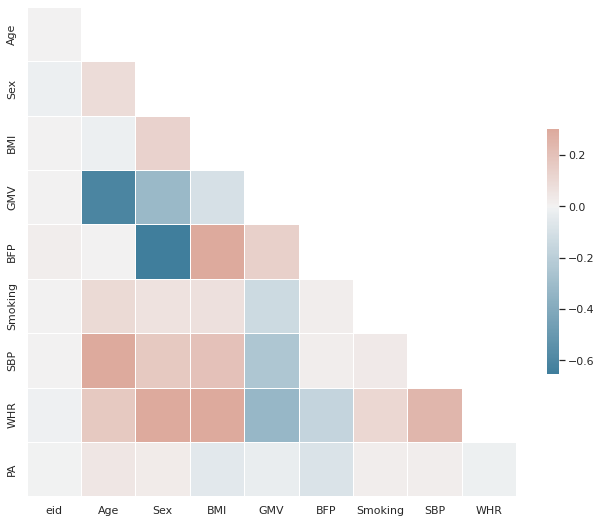

In [215]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr=df.corr().to_numpy()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr[1:,:-1], mask=mask[1:,:-1], cmap=cmap, vmax=.3, center=0, xticklabels=df.columns[:-1],  yticklabels=df.columns[1:],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [216]:
df.to_csv('./ukbb_CMR.csv', index=False)